Tablero inicial:


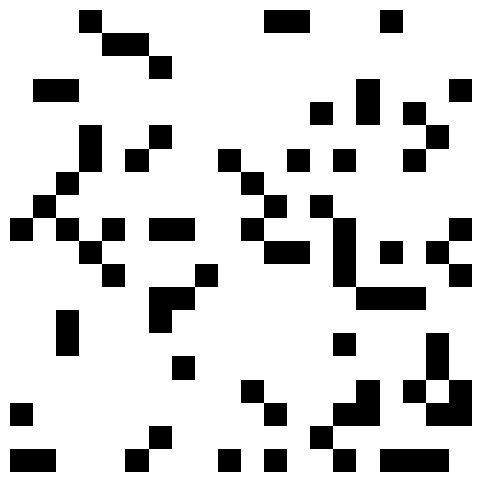

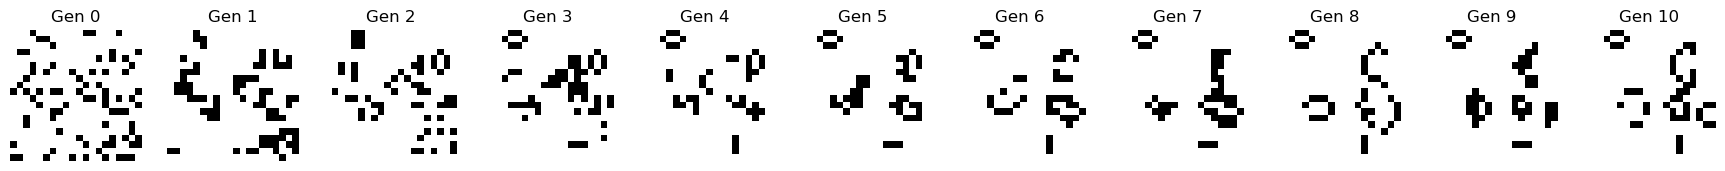

In [3]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. Inicialización del tablero
def initialize_board(rows, cols, random_seed=None):
    """
    Inicializa el tablero del Juego de la Vida.
    
    Args:
        rows (int): Número de filas del tablero.
        cols (int): Número de columnas del tablero.
        random_seed (int, opcional): Semilla para reproducir resultados aleatorios.
    
    Returns:
        numpy.ndarray: Tablero inicial con valores 0 (muerto) o 1 (vivo).
    """
    if random_seed is not None:
        np.random.seed(random_seed)  # Asegurar reproducibilidad
    return np.random.choice([0, 1], size=(rows, cols), p=[0.8, 0.2])

# 2. Reglas del Juego de la Vida
def update_board(board):
    """
    Actualiza el tablero aplicando las reglas del Juego de la Vida.
    
    Args:
        board (numpy.ndarray): El tablero actual.
    
    Returns:
        numpy.ndarray: El tablero actualizado.
    """
    # Crear una copia del tablero para calcular las nuevas generaciones
    new_board = board.copy()
    rows, cols = board.shape

    for row in range(rows):
        for col in range(cols):
            # Contar vecinos vivos
            neighbors = (
                board[max(0, row-1):min(row+2, rows), max(0, col-1):min(col+2, cols)].sum()
                - board[row, col]  # Excluir la célula actual
            )
            
            # Aplicar reglas del Juego de la Vida
            if board[row, col] == 1:  # Si la célula está viva
                if neighbors < 2 or neighbors > 3:  # Muere por soledad o sobrepoblación
                    new_board[row, col] = 0
            elif board[row, col] == 0:  # Si la célula está muerta
                if neighbors == 3:  # Nace por reproducción
                    new_board[row, col] = 1

    return new_board

# 3. Visualización
def plot_board(board):
    """
    Dibuja el tablero usando matplotlib.
    
    Args:
        board (numpy.ndarray): Tablero a visualizar.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.show()

# 4. Simulación
def run_simulation(initial_board, steps):
    """
    Ejecuta la simulación del Juego de la Vida y almacena cada paso.
    
    Args:
        initial_board (numpy.ndarray): Tablero inicial.
        steps (int): Número de ciclos a simular.
    
    Returns:
        list: Lista de tableros en cada paso de la simulación.
    """
    board = initial_board
    boards = [board]
    for step in range(steps):
        board = update_board(board)
        boards.append(board)
    return boards

# 5. Visualización de la simulación
def plot_simulation(boards):
    """
    Dibuja los tableros de la simulación en una cuadrícula.
    
    Args:
        boards (list): Lista de tableros en cada paso de la simulación.
    """
    steps = len(boards)
    fig, axes = plt.subplots(1, steps, figsize=(steps * 2, 2))
    for i, board in enumerate(boards):
        ax = axes[i]
        ax.imshow(board, cmap='binary', interpolation='nearest')
        ax.axis('off')
        ax.set_title(f'Gen {i}')
    plt.show()

# Ejemplo de uso
# Configuración inicial
rows, cols = 20, 20  # Tamaño del tablero
initial_board = initialize_board(rows, cols)  # Remove random_seed to get different boards

# Mostrar el tablero inicial
print("Tablero inicial:")
plot_board(initial_board)

# Ejecutar la simulación
steps = 10
boards = run_simulation(initial_board, steps)

# Mostrar la simulación
plot_simulation(boards)


# Pedi una ventana con la animacion cuztomizable

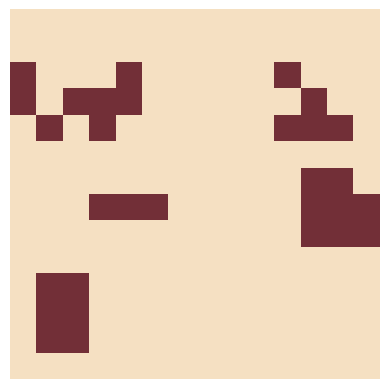

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Function to initialize the board
def initialize_board(rows=14, cols=14, random_seed=None):
    """
    Initializes the board for the Game of Life.

    Args:
        rows (int): Number of rows in the board.
        cols (int): Number of columns in the board.
        random_seed (int, optional): Seed for random number generator.

    Returns:
        numpy.ndarray: Initial board with 0 (dead) and 1 (alive) cells.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    return np.random.choice([0, 1], size=(rows, cols), p=[0.8, 0.2])

# Function to update the board
def update_board(board):
    """
    Updates the board according to the Game of Life rules.

    Args:
        board (numpy.ndarray): Current board state.

    Returns:
        numpy.ndarray: Updated board state.
    """
    new_board = board.copy()
    rows, cols = board.shape

    for row in range(rows):
        for col in range(cols):
            neighbors = (
                board[max(0, row-1):min(row+2, rows), max(0, col-1):min(col+2, cols)].sum()
                - board[row, col]
            )
            if board[row, col] == 1:  # Alive cell
                if neighbors < 2 or neighbors > 3:
                    new_board[row, col] = 0
            elif board[row, col] == 0:  # Dead cell
                if neighbors == 3:
                    new_board[row, col] = 1

    return new_board

# Function to launch the simulation
def launch_simulation(
    rows=14,
    cols=14,
    frames_per_second=1,
    steps=500,
    alive_color="#722F37",  # Wine
    dead_color="#F5E0C2"  # Cream
):
    """
    Launches an animated simulation of the Game of Life.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        frames_per_second (int): Animation speed in frames per second.
        steps (int): Number of steps to simulate.
        alive_color (str): Color for alive cells.
        dead_color (str): Color for dead cells.
    """
    board = initialize_board(rows, cols)

    fig, ax = plt.subplots()
    fig.canvas.mpl_connect('key_press_event', lambda event: plt.close(fig) if event.key == 'q' else None)
    fig.canvas.mpl_connect('button_press_event', lambda event: plt.close(fig))

    # Create a colormap for the grid
    cmap = plt.matplotlib.colors.ListedColormap([dead_color, alive_color])
    
    img = ax.imshow(board, cmap=cmap, interpolation="nearest")
    ax.axis('off')

    def update(frame):
        nonlocal board
        board = update_board(board)
        img.set_array(board)
        return [img]

    anim = FuncAnimation(
        fig,
        update,
        frames=steps,
        interval=1000 // frames_per_second,
        blit=True
    )

    plt.show(block=True)
    plt.pause(3)  # Keeps the window open for 3 minutes after the animation

# Example usage
if __name__ == "__main__":
    launch_simulation()


Bueno esto de ariba supuestamente ejecutaba una animacion que nunca vi.

# Ahora le pedi hacer una clase para guardar partidas

In [5]:
import numpy as np
import pygame
import time

class GameOfLife:
    def __init__(self, rows=14, cols=14, alive_color=(114, 47, 55), dead_color=(245, 224, 194)):
        """
        Initializes the Game of Life simulation.

        Args:
            rows (int): Number of rows in the grid.
            cols (int): Number of columns in the grid.
            alive_color (tuple): RGB color for alive cells.
            dead_color (tuple): RGB color for dead cells.
        """
        self.rows = rows
        self.cols = cols
        self.alive_color = alive_color
        self.dead_color = dead_color
        self.board = self.initialize_board()
        self.steps = 0
        self.start_time = None

    def initialize_board(self, random_seed=None):
        if random_seed is not None:
            np.random.seed(random_seed)
        return np.random.choice([0, 1], size=(self.rows, self.cols), p=[0.8, 0.2])

    def update_board(self):
        new_board = self.board.copy()
        for row in range(self.rows):
            for col in range(self.cols):
                neighbors = (
                    self.board[max(0, row-1):min(row+2, self.rows), max(0, col-1):min(col+2, self.cols)].sum()
                    - self.board[row, col]
                )
                if self.board[row, col] == 1:  # Alive cell
                    if neighbors < 2 or neighbors > 3:
                        new_board[row, col] = 0
                elif self.board[row, col] == 0:  # Dead cell
                    if neighbors == 3:
                        new_board[row, col] = 1
        self.board = new_board
        self.steps += 1

    def run_simulation(self, frames_per_second=1, steps=500):
        pygame.init()
        cell_size = 20
        screen = pygame.display.set_mode((self.cols * cell_size, self.rows * cell_size))
        pygame.display.set_caption("Game of Life")
        clock = pygame.time.Clock()

        running = True
        self.start_time = time.time()
        for _ in range(steps):
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    running = False
                    break

            if not running:
                break

            screen.fill(self.dead_color)
            for row in range(self.rows):
                for col in range(self.cols):
                    color = self.alive_color if self.board[row, col] == 1 else self.dead_color
                    pygame.draw.rect(
                        screen,
                        color,
                        (col * cell_size, row * cell_size, cell_size - 1, cell_size - 1)
                    )

            pygame.display.flip()
            self.update_board()
            clock.tick(frames_per_second)

        execution_time = time.time() - self.start_time
        print(f"Simulation completed in {execution_time:.2f} seconds and {self.steps} steps.")
        pygame.quit()

# Example usage
if __name__ == "__main__":
    game = GameOfLife(rows=50, cols=50)
    game.run_simulation(frames_per_second=2, steps=100)


Simulation completed in 50.05 seconds and 100 steps.


# ahora q guarde un GIF

In [6]:
import numpy as np
import pygame
import time
from PIL import Image, ImageDraw, ImageSequence
import os

class GameOfLife:
    def __init__(self, rows=14, cols=14, alive_color=(114, 47, 55), dead_color=(245, 224, 194)):
        """
        Initializes the Game of Life simulation.

        Args:
            rows (int): Number of rows in the grid.
            cols (int): Number of columns in the grid.
            alive_color (tuple): RGB color for alive cells.
            dead_color (tuple): RGB color for dead cells.
        """
        self.rows = rows
        self.cols = cols
        self.alive_color = alive_color
        self.dead_color = dead_color
        self.board = self.initialize_board()
        self.steps = 0
        self.start_time = None

    def initialize_board(self, random_seed=None):
        if random_seed is not None:
            np.random.seed(random_seed)
        return np.random.choice([0, 1], size=(self.rows, self.cols), p=[0.8, 0.2])

    def update_board(self):
        new_board = self.board.copy()
        for row in range(self.rows):
            for col in range(self.cols):
                neighbors = (
                    self.board[max(0, row-1):min(row+2, self.rows), max(0, col-1):min(col+2, self.cols)].sum()
                    - self.board[row, col]
                )
                if self.board[row, col] == 1:  # Alive cell
                    if neighbors < 2 or neighbors > 3:
                        new_board[row, col] = 0
                elif self.board[row, col] == 0:  # Dead cell
                    if neighbors == 3:
                        new_board[row, col] = 1
        self.board = new_board
        self.steps += 1

    def run_simulation(self, frames_per_second=1, steps=500):
        pygame.init()
        cell_size = 20
        screen = pygame.display.set_mode((self.cols * cell_size, self.rows * cell_size))
        pygame.display.set_caption("Game of Life")
        clock = pygame.time.Clock()

        running = True
        self.start_time = time.time()
        for _ in range(steps):
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    running = False
                    break

            if not running:
                break

            screen.fill(self.dead_color)
            for row in range(self.rows):
                for col in range(self.cols):
                    color = self.alive_color if self.board[row, col] == 1 else self.dead_color
                    pygame.draw.rect(
                        screen,
                        color,
                        (col * cell_size, row * cell_size, cell_size - 1, cell_size - 1)
                    )

            pygame.display.flip()
            self.update_board()
            clock.tick(frames_per_second)

        execution_time = time.time() - self.start_time
        print(f"Simulation completed in {execution_time:.2f} seconds and {self.steps} steps.")
        pygame.quit()

    def save_to_gif(self, filename="game_of_life.gif", frames_per_second=1, steps=100):
        """
        Saves the simulation as a GIF file.

        Args:
            filename (str): Name of the output GIF file.
            frames_per_second (int): Frame rate for the GIF.
            steps (int): Number of steps to include in the GIF.
        """
        cell_size = 10
        images = []

        for _ in range(steps):
            # Create an image for the current board state
            img = Image.new("RGB", (self.cols * cell_size, self.rows * cell_size), self.dead_color)
            draw = ImageDraw.Draw(img)

            for row in range(self.rows):
                for col in range(self.cols):
                    if self.board[row, col] == 1:
                        x0, y0 = col * cell_size, row * cell_size
                        x1, y1 = x0 + cell_size, y0 + cell_size
                        draw.rectangle([x0, y0, x1, y1], fill=self.alive_color)

            images.append(img)
            self.update_board()

        # Save images as a GIF
        images[0].save(
            filename,
            save_all=True,
            append_images=images[1:],
            duration=1000 // frames_per_second,
            loop=0
        )
        print(f"GIF saved as {filename}")

        # Open the GIF in the default image viewer
        os.system(f"xdg-open {filename}" if os.name == "posix" else f"start {filename}")

# Example usage
if __name__ == "__main__":
    game = GameOfLife(rows=14, cols=14)
    game.save_to_gif(frames_per_second=2, steps=50)


GIF saved as game_of_life.gif


In [7]:
import random
from PIL import Image, ImageDraw
import os

def generate_random_color():
    """
    Generates a random bright or dark color.
    
    Returns:
        tuple: RGB color.
    """
    return tuple(random.randint(0, 255) for _ in range(3))

def save_gif_with_random_colors(boards, filename="game_of_life_random_colors.gif", steps=10):
    """
    Saves the simulation as a GIF file with random bright and dark color pairs.

    Args:
        boards (list): List of board states.
        filename (str): Name of the output GIF file.
        steps (int): Number of steps to include in the GIF.
    """
    cell_size = 10
    images = []

    bright_color = generate_random_color()
    dark_color = generate_random_color()

    for board in boards[:steps]:
        img = Image.new("RGB", (cols * cell_size, rows * cell_size), dark_color)
        draw = ImageDraw.Draw(img)

        for row in range(rows):
            for col in range(cols):
                if board[row, col] == 1:
                    x0, y0 = col * cell_size, row * cell_size
                    x1, y1 = x0 + cell_size, y0 + cell_size
                    draw.rectangle([x0, y0, x1, y1], fill=bright_color)

        images.append(img)

    # Save images as a GIF
    download_path = os.path.join(os.path.expanduser("~"), "Downloads", filename)
    images[0].save(
        download_path,
        save_all=True,
        append_images=images[1:],
        duration=1000 // 3,  # Three times faster pace
        loop=0
    )
    print(f"GIF saved as {download_path}")

    # Open the GIF in the default image viewer
    os.system(f"xdg-open {download_path}" if os.name == "posix" else f"start {download_path}")

# Example usage
save_gif_with_random_colors(boards, steps=steps)



GIF saved as C:\Users\User\Downloads\game_of_life_random_colors.gif


# class integration

In [8]:
import numpy as np
import pygame
import time
from PIL import Image, ImageDraw
import os
import random

class GameOfLife:
    def __init__(self, rows=14, cols=14, alive_color=(114, 47, 55), dead_color=(245, 224, 194)):
        self.rows = rows
        self.cols = cols
        self.alive_color = alive_color
        self.dead_color = dead_color
        self.board = self.initialize_board()
        self.steps = 0
        self.start_time = None

    def initialize_board(self, random_seed=None):
        if random_seed is not None:
            np.random.seed(random_seed)
        return np.random.choice([0, 1], size=(self.rows, self.cols), p=[0.8, 0.2])

    def update_board(self):
        new_board = self.board.copy()
        for row in range(self.rows):
            for col in range(self.cols):
                neighbors = (
                    self.board[max(0, row-1):min(row+2, self.rows), max(0, col-1):min(col+2, self.cols)].sum()
                    - self.board[row, col]
                )
                if self.board[row, col] == 1:
                    if neighbors < 2 or neighbors > 3:
                        new_board[row, col] = 0
                elif self.board[row, col] == 0:
                    if neighbors == 3:
                        new_board[row, col] = 1
        self.board = new_board
        self.steps += 1

    def generate_random_colors(self):
        """
        Generates a pair of random bright and dark colors.
        Returns:
            tuple: (alive_color, dead_color)
        """
        bright_color = tuple(random.randint(128, 255) for _ in range(3))  # Bright colors
        dark_color = tuple(random.randint(0, 127) for _ in range(3))  # Dark colors
        return bright_color, dark_color

    def save_to_gif(self, filename="game_of_life.gif", frames_per_second=1, steps=100, random_colors=False):
        """
        Saves the simulation as a GIF file.
        Args:
            filename (str): Name of the output GIF file.
            frames_per_second (int): Frame rate for the GIF.
            steps (int): Number of steps to include in the GIF.
            random_colors (bool): If True, use random colors for the GIF.
        """
        cell_size = 10
        images = []

        if random_colors:
            self.alive_color, self.dead_color = self.generate_random_colors()

        for _ in range(steps):
            img = Image.new("RGB", (self.cols * cell_size, self.rows * cell_size), self.dead_color)
            draw = ImageDraw.Draw(img)
            for row in range(self.rows):
                for col in range(self.cols):
                    if self.board[row, col] == 1:
                        x0, y0 = col * cell_size, row * cell_size
                        x1, y1 = x0 + cell_size, y0 + cell_size
                        draw.rectangle([x0, y0, x1, y1], fill=self.alive_color)
            images.append(img)
            self.update_board()

        images[0].save(
            filename,
            save_all=True,
            append_images=images[1:],
            duration=1000 // frames_per_second,
            loop=0
        )
        print(f"GIF saved as {filename}")
        os.system(f"xdg-open {filename}" if os.name == "posix" else f"start {filename}")


In [9]:

# Example usage
if __name__ == "__main__":
    game = GameOfLife(rows=14, cols=14)
    game.save_to_gif(frames_per_second=2, steps=50, random_colors=True)


GIF saved as game_of_life.gif


# Pido que me genera una estructura para mi proyecto debido a la altisimo modulacion que alcance con rapidez

In [10]:
import os

def create_project_structure(base_path):
    """
    Crea la estructura de carpetas y archivos para un proyecto de Game of Life.

    Args:
        base_path (str): Ruta base donde se creará la estructura del proyecto.

    Returns:
        None
    """
    # Definimos la estructura de carpetas y archivos
    structure = {
        "data": ["input", "output"],
        "notebooks": ["development.ipynb", "analysis.ipynb"],
        "src": ["__init__.py", "game_of_life.py", "dithering.py", "image_processing.py", "utils.py"],
        "tests": ["test_game_of_life.py", "test_dithering.py"],
        "docs": ["README.md", "algorithms.md"],
    }

    files = ["requirements.txt", "environment.yml", "setup.py", ".gitignore"]

    # Crear carpetas y archivos
    for folder, subitems in structure.items():
        folder_path = os.path.join(base_path, folder)
        os.makedirs(folder_path, exist_ok=True)

        for subitem in subitems:
            subitem_path = os.path.join(folder_path, subitem)
            if "." in subitem:  # Es un archivo
                with open(subitem_path, "w") as f:
                    pass

    # Crear archivos raíz
    for file in files:
        file_path = os.path.join(base_path, file)
        with open(file_path, "w") as f:
            pass

    print(f"Estructura de proyecto creada en: {base_path}")

# Ejemplo de uso
# create_project_structure(r"C:\Users\User\Desktop\Final_Streamlit_Portfolio_Projects\Side_quest_gameoflife")


# Implementaciones paso por paso

## la clase incial del juego

In [4]:
import numpy as np
from datetime import datetime
import platform
import cpuinfo

class Execution:
    def __init__(self, dimensions, steps, initial_state, seed=None):
        """
        Class to store and manage metadata and statistics for a Game of Life execution.

        Args:
            dimensions (tuple): Dimensions of the board (rows, columns).
            steps (int): Maximum number of steps to execute.
            initial_state (numpy.ndarray): Initial state of the board.
            seed (int, optional): Seed used for reproducibility.
        """
        self.dimensions = dimensions
        self.steps = steps
        self.initial_state = initial_state
        self.seed = seed
        self.timestamp = datetime.now()  # Timestamp for the start of the execution
        self.step_count = 0
        self.alive_cells_stats = []  # Percentage of alive cells per step
        self.max_alive_cells = 0
        self.min_alive_cells = np.prod(dimensions)
        self.execution_time = 0
        self.processor_info = cpuinfo.get_cpu_info()

    def update_stats(self, board):
        """
        Updates the statistics of the execution for each step.

        Args:
            board (numpy.ndarray): Current board state after a step.
        """
        alive_cells = np.sum(board)
        total_cells = self.dimensions[0] * self.dimensions[1]
        alive_percentage = alive_cells / total_cells * 100
        self.alive_cells_stats.append(alive_percentage)
        self.max_alive_cells = max(self.max_alive_cells, alive_cells)
        self.min_alive_cells = min(self.min_alive_cells, alive_cells)

    def finalize(self, step_count, execution_time):
        """
        Finalizes the execution by recording final statistics.

        Args:
            step_count (int): Total number of steps executed.
            execution_time (float): Total execution time in seconds.
        """
        self.step_count = step_count
        self.execution_time = execution_time

    def to_dict(self):
        """
        Converts the metadata into a dictionary for export.

        Returns:
            dict: A dictionary containing metadata and statistics.
        """
        return {
            "dimensions": self.dimensions,
            "steps": self.steps,
            "step_count": self.step_count,
            "execution_time": self.execution_time,
            "max_alive_cells": self.max_alive_cells,
            "min_alive_cells": self.min_alive_cells,
            "alive_cells_stats": self.alive_cells_stats,
            "seed": self.seed,
            "timestamp": self.timestamp.isoformat(),
            "processor": self.processor_info.get('brand_raw', 'Unknown Processor'),
            "architecture": platform.architecture()[0],
            "system": platform.system(),
            "processor_name": platform.processor()
        }


class GameOfLife:
    def __init__(self, dimensions=(10, 10), steps=0, initial_state=None, seed=None):
        """
        Class implementing Conway's Game of Life simulation.

        Args:
            dimensions (tuple): Dimensions of the board (rows, columns).
            steps (int): Number of steps to run the simulation.
            initial_state (numpy.ndarray, optional): Custom initial board state.
            seed (int, optional): Seed for reproducibility.
        """
        self.rows, self.cols = dimensions
        self.steps = steps
        np.random.seed(seed)
        self.seed = seed
        self.board = (
            initial_state
            if initial_state is not None
            else np.random.randint(2, size=(self.rows, self.cols))
        )
        self.execution = Execution(
            dimensions=dimensions, steps=steps, initial_state=self.board.copy(), seed=seed
        )

    def count_neighbors(self, board):
        """
        Counts the number of alive neighbors for each cell.

        Args:
            board (numpy.ndarray): Current state of the board.

        Returns:
            numpy.ndarray: Array with neighbor counts for each cell.
        """
        neighbors = (
            np.roll(np.roll(board, 1, axis=0), 1, axis=1) +
            np.roll(np.roll(board, 1, axis=0), -1, axis=1) +
            np.roll(np.roll(board, -1, axis=0), 1, axis=1) +
            np.roll(np.roll(board, -1, axis=0), -1, axis=1) +
            np.roll(board, 1, axis=0) +
            np.roll(board, -1, axis=0) +
            np.roll(board, 1, axis=1) +
            np.roll(board, -1, axis=1)
        )
        return neighbors

    def step(self):
        """
        Executes a single step of the simulation, updating the board state.
        """
        neighbors = self.count_neighbors(self.board)
        self.board = (
            (self.board & (neighbors == 2)) | (neighbors == 3)
        ).astype(int)
        self.execution.update_stats(self.board)

    def run(self):
        """
        Runs the simulation for the specified number of steps.
        """
        import time
        start_time = time.time()
        for step in range(self.steps):
            self.step()
        end_time = time.time()
        self.execution.finalize(step + 1, end_time - start_time)


In [14]:

# Example usage:
game = GameOfLife(dimensions=(20, 20), steps=10, seed=42)
game.run()
metadata = game.execution.to_dict()

# Display metadata in a user-friendly format
print("--- Execution Metadata ---")
print(f"Dimensions: {metadata['dimensions']}")
print(f"Defined steps: {metadata['steps']}")
print(f"Executed steps: {metadata['step_count']}")
print(f"Execution time: {metadata['execution_time']:.2f} seconds")
print(f"Max alive cells: {metadata['max_alive_cells']}")
print(f"Min alive cells: {metadata['min_alive_cells']}")
print(f"Seed used: {metadata['seed']}")
print(f"Start time: {metadata['timestamp']}")
print(f"Processor: {metadata['processor']}")
print(f"Architecture: {metadata['architecture']}")
print(f"Operating system: {metadata['system']}")
print(f"Processor name: {metadata['processor_name']}")


--- Execution Metadata ---
Dimensions: (20, 20)
Defined steps: 10
Executed steps: 10
Execution time: 0.00 seconds
Max alive cells: 104
Min alive cells: 61
Seed used: 42
Start time: 2025-01-11T14:15:12.875432
Processor: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz
Architecture: 64bit
Operating system: Windows
Processor name: Intel64 Family 6 Model 142 Stepping 11, GenuineIntel


# Documentation
"""
Project Documentation: Game of Life
-----------------------------------
This project implements an optimized simulation of Conway's "Game of Life," designed to be efficient and scalable with the following key features:

1. **Algorithmic Efficiency:**
   - Utilizes NumPy vectorized operations to compute neighbors and update states, avoiding unnecessary loops.
   - Memory optimization by storing only the current state and key statistics.

2. **Reproducibility:**
   - Allows initialization with a specific seed to generate reproducible states.
   - Records the initial state and configuration parameters in execution metadata.

3. **Modular Flexibility:**
   - Separate `Execution` class to handle metadata, statistics, and export functionalities.
   - Capability to integrate new features like custom patterns or extended rules.

4. **Compatibility and Transparency:**
   - Includes technical details of the execution environment, such as processor and operating system.
   - User-friendly console output for interpreting results.

Example Operations:
-------------------
1. **Create a Game of Life Simulation:**
    ```python
    game = GameOfLife(dimensions=(30, 30), steps=50, seed=1234)
    ```

2. **Run the Simulation:**
    ```python
    game.run()
    ```

3. **Retrieve Metadata:**
    ```python
    metadata = game.execution.to_dict()
    print(metadata)
    ```

4. **Custom Initial State:**
    ```python
    custom_state = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    game = GameOfLife(dimensions=(3, 3), steps=10, initial_state=custom_state)
    ```

This design ensures a balance of simplicity, efficiency, and scalability for future developments or deeper analysis.
"""


# Ahora la visualizacion, por su lado

now a game vizualizer

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def plot_animation(game_of_life, interval=200, cell_color='black', grid_color='gray', figsize=(6, 6), show=True):
    """
    Visualiza la animación de una simulación de Game of Life.

    Args:
        game_of_life (GameOfLife): Instancia del juego.
        interval (int): Intervalo en milisegundos entre cuadros.
        cell_color (str): Color de las celdas vivas.
        grid_color (str): Color de la cuadrícula.
        figsize (tuple): Tamaño de la figura.
        show (bool): Si True, muestra la animación; si False, no la muestra.
    """
    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xticks([])
    ax.set_yticks([])

    # Configuración inicial del tablero
    board = game_of_life.board
    img = ax.imshow(board, cmap='Greys', interpolation='nearest', vmin=0, vmax=1)

    # Función de actualización para la animación
    def update(frame):
        game_of_life.step()
        img.set_data(game_of_life.board)
        return [img]

    # Crear la animación
    anim = FuncAnimation(
        fig, update, frames=game_of_life.steps, interval=interval, blit=True
    )

    if show:
        plt.show()
    else:
        plt.close(fig)

    return anim


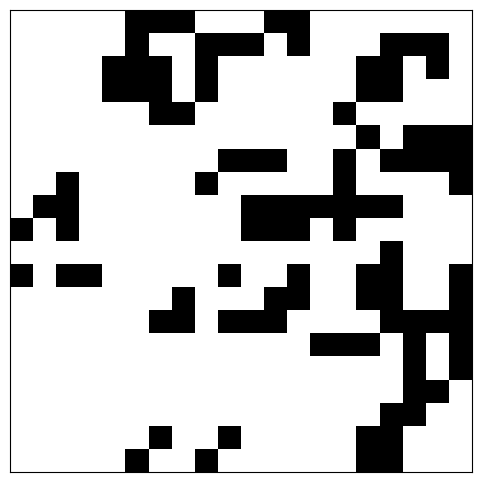

In [15]:
game = GameOfLife(dimensions=(20, 20), steps=50)#, seed=42)
animation = plot_animation(game, interval=100, figsize=(6, 6), show=True)


## ahora el pygame

In [8]:
import pygame
import numpy as np

def visualize_with_pygame(game_of_life, cell_size=10, alive_color=(0, 255, 0), dead_color=(0, 0, 0), grid_color=(50, 50, 50), fps=10):
    """
    Visualiza la simulación del Game of Life usando pygame.

    Args:
        game_of_life (GameOfLife): Instancia del juego.
        cell_size (int): Tamaño de cada celda en píxeles.
        alive_color (tuple): Color de las celdas vivas (RGB).
        dead_color (tuple): Color de las celdas muertas (RGB).
        grid_color (tuple): Color de las líneas de la cuadrícula (RGB).
        fps (int): Cuadros por segundo para la animación.
    """
    pygame.init()

    # Dimensiones de la ventana
    width, height = game_of_life.cols * cell_size, game_of_life.rows * cell_size
    screen = pygame.display.set_mode((width, height))
    pygame.display.set_caption("Game of Life")

    # Reloj para controlar el framerate
    clock = pygame.time.Clock()

    running = True
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # Avanzar un paso en la simulación
        game_of_life.step()

        # Dibujar el estado actual del tablero
        screen.fill(grid_color)  # Fondo con color de cuadrícula
        for row in range(game_of_life.rows):
            for col in range(game_of_life.cols):
                color = alive_color if game_of_life.board[row, col] == 1 else dead_color
                pygame.draw.rect(
                    screen,
                    color,
                    pygame.Rect(
                        col * cell_size, row * cell_size, cell_size, cell_size
                    )
                )

        pygame.display.flip()
        clock.tick(fps)

    pygame.quit()


In [ ]:
# game = GameOfLife(dimensions=(30, 30), steps=0, seed=42)  # Pasos ilimitados
# visualize_with_pygame(game, cell_size=20, fps=5)


## siguiente iteracion:

In [33]:
import pygame
import numpy as np
import random

def generate_color_pair():
    """
    Genera un par de colores predefinidos de una biblioteca estilística.

    Returns:
        tuple: (alive_color, dead_color) en formato RGB.
    """
    color_palettes = [
        ((0, 255, 0), (0, 0, 0)),  # Verde vivo sobre negro
        ((0, 0, 255), (10, 10, 30)),  # Azul vivo sobre azul oscuro
        ((255, 165, 0), (30, 15, 5)),  # Naranja sobre marrón oscuro
        ((255, 0, 0), (50, 0, 0)),  # Rojo sobre rojo oscuro
        ((255, 255, 255), (0, 0, 0)),  # Blanco sobre negro
        ((255, 223, 186), (34, 34, 59))  # Tono pastel sobre azul profundo
    ]
    return random.choice(color_palettes)

def invert_colors(alive_color, dead_color):
    """
    Invierte los colores vivos y muertos.

    Args:
        alive_color (tuple): Color actual de las celdas vivas.
        dead_color (tuple): Color actual de las celdas muertas.

    Returns:
        tuple: Nuevos colores invertidos (alive_color, dead_color).
    """
    return dead_color, alive_color

def visualize_with_pygame(
    game_of_life,
    cell_size=10,
    alive_color=(0, 255, 0),
    dead_color=(0, 0, 0),
    grid_color=(50, 50, 50),
    fps=10,
    show_stats=False
):
    """
    Visualiza la simulación del Game of Life usando pygame.

    Args:
        game_of_life (GameOfLife): Instancia del juego.
        cell_size (int): Tamaño de cada celda en píxeles.
        alive_color (tuple): Color de las celdas vivas (RGB).
        dead_color (tuple): Color de las celdas muertas (RGB).
        grid_color (tuple): Color de las líneas de la cuadrícula (RGB).
        fps (int): Cuadros por segundo para la animación.
        show_stats (bool): Si True, muestra estadísticas minimalistas.
    """
    pygame.init()

    # Dimensiones de la ventana
    width, height = game_of_life.cols * cell_size, game_of_life.rows * cell_size
    screen = pygame.display.set_mode((width, height))
    pygame.display.set_caption("Game of Life")

    # Fuente para estadísticas (si están habilitadas)
    font = pygame.font.SysFont("consolas", 20)

    # Reloj para controlar el framerate
    clock = pygame.time.Clock()

    running = True
    paused = False
    generation = 0
    previous_boards = []
    loop_counter = 0
    max_loops = 60  # Límite de iteraciones en caso de estancamiento

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_SPACE:  # Pausar/Reanudar
                    paused = not paused
                elif event.key == pygame.K_r:  # Reiniciar
                    game_of_life.board = np.random.randint(2, size=(game_of_life.rows, game_of_life.cols))
                    generation = 0
                    previous_boards = []
                    loop_counter = 0

        if not paused:
            # Avanzar un paso en la simulación
            game_of_life.step()
            generation += 1

            # Verificar ciclos o estancamiento
            board_tuple = tuple(map(tuple, game_of_life.board))
            if board_tuple in previous_boards:
                alive_color, dead_color = invert_colors(alive_color, dead_color)
                loop_counter += 1
                if loop_counter >= max_loops:
                    show_stats = True  # Forzar mostrar estadísticas
                    running = False  # Terminar ejecución después del countdown
            else:
                loop_counter = 0  # Reinicia el contador si no hay ciclo

            previous_boards.append(board_tuple)
            if len(previous_boards) > 10:  # Mantener un historial limitado
                previous_boards.pop(0)

        # Dibujar el estado actual del tablero
        screen.fill(grid_color)  # Fondo con color de cuadrícula
        for row in range(game_of_life.rows):
            for col in range(game_of_life.cols):
                color = alive_color if game_of_life.board[row, col] == 1 else dead_color
                pygame.draw.rect(
                    screen,
                    color,
                    pygame.Rect(
                        col * cell_size, row * cell_size, cell_size, cell_size
                    )
                )

        # Mostrar estadísticas si está habilitado
        if show_stats:
            if loop_counter >= max_loops:
                stats_text = f"LOOP DETECTED | Countdown: {max_loops - loop_counter}"
            else:
                alive_cells = np.sum(game_of_life.board)
                stats_text = f"Gen: {generation} | Alive: {alive_cells}"
            stats_surface = font.render(stats_text, True, (255, 255, 255))
            screen.blit(stats_surface, (10, 10))

        pygame.display.flip()
        clock.tick(fps)

    pygame.quit()


In [35]:
alive_color, dead_color = generate_color_pair()
visualize_with_pygame(game, cell_size=15, alive_color=alive_color, dead_color=dead_color, show_stats=True)


# Nueva game engine  enhhanced metadata colection by animation

In [4]:
import numpy as np
from datetime import datetime
import platform
import cpuinfo
import json
import os

class Execution:
    def __init__(self, dimensions, steps, initial_state, seed=None):
        """
        Class to store and manage metadata and statistics for a Game of Life execution.

        Args:
            dimensions (tuple): Dimensions of the board (rows, columns).
            steps (int): Maximum number of steps to execute.
            initial_state (numpy.ndarray): Initial state of the board.
            seed (int, optional): Seed used for reproducibility.
        """
        self.dimensions = dimensions
        self.steps = steps
        self.initial_state = initial_state
        self.seed = seed
        self.timestamp = datetime.now()  # Timestamp for the start of the execution
        self.step_count = 0
        self.alive_cells_stats = []  # Percentage of alive cells per step
        self.max_alive_cells = 0
        self.min_alive_cells = np.prod(dimensions)
        self.execution_time = 0
        self.processor_info = cpuinfo.get_cpu_info()
        self.loop_detected = False
        self.loop_length = 0
        self.operations_count = 0

    def update_stats(self, board):
        """
        Updates the statistics of the execution for each step.

        Args:
            board (numpy.ndarray): Current board state after a step.
        """
        alive_cells = np.sum(board)
        total_cells = self.dimensions[0] * self.dimensions[1]
        alive_percentage = alive_cells / total_cells * 100
        self.alive_cells_stats.append(alive_percentage)
        self.max_alive_cells = max(self.max_alive_cells, alive_cells)
        self.min_alive_cells = min(self.min_alive_cells, alive_cells)
        self.operations_count += 1

    def finalize(self, step_count, execution_time, loop_detected=False, loop_length=0):
        """
        Finalizes the execution by recording final statistics.

        Args:
            step_count (int): Total number of steps executed.
            execution_time (float): Total execution time in seconds.
            loop_detected (bool): Whether a loop was detected.
            loop_length (int): Length of the detected loop.
        """
        self.step_count = step_count
        self.execution_time = execution_time
        self.loop_detected = loop_detected
        self.loop_length = loop_length

    def get_total_execution_time(self):
        """
        Returns the total execution time for the simulation.

        Returns:
            float: Total execution time in seconds.
        """
        return self.execution_time

    def summary(self):
        """
        Generates a user-friendly summary of the execution statistics.

        Returns:
            str: A formatted string summarizing the execution.
        """
        return f"""
        Game of Life Execution Summary
        --------------------------------
        Dimensions: {self.dimensions[0]} x {self.dimensions[1]}
        Steps Executed: {self.step_count}/{self.steps}
        Execution Time: {self.execution_time:.2f} seconds
        Max Alive Cells: {self.max_alive_cells}
        Min Alive Cells: {self.min_alive_cells}
        Operations Count: {self.operations_count}
        Loop Detected: {'Yes' if self.loop_detected else 'No'}
        Loop Length: {self.loop_length if self.loop_detected else 'N/A'}
        Timestamp: {self.timestamp.strftime('%Y-%m-%d %H:%M:%S')}
        Processor: {self.processor_info.get('brand_raw', 'Unknown Processor')}
        System: {platform.system()} {platform.architecture()[0]}
        """

    def to_dict(self):
        """
        Converts the metadata into a dictionary for export.

        Returns:
            dict: A dictionary containing metadata and statistics.
        """
        return {
            "dimensions": tuple(map(int, self.dimensions)),
            "steps": int(self.steps),
            "step_count": int(self.step_count),
            "execution_time": float(self.execution_time),
            "max_alive_cells": int(self.max_alive_cells),
            "min_alive_cells": int(self.min_alive_cells),
            "alive_cells_stats": [float(x) for x in self.alive_cells_stats],
            "seed": int(self.seed) if self.seed is not None else None,
            "timestamp": self.timestamp.isoformat(),
            "processor": self.processor_info.get('brand_raw', 'Unknown Processor'),
            "architecture": platform.architecture()[0],
            "system": platform.system(),
            "processor_name": platform.processor(),
            "loop_detected": self.loop_detected,
            "loop_length": int(self.loop_length),
            "operations_count": int(self.operations_count)
        }

    def save_to_json(self, folder="results", filename="game_of_life_stats.json"):
        """
        Saves the execution statistics to a JSON file.

        Args:
            folder (str): The folder where the file will be saved.
            filename (str): The name of the JSON file.
        """
        os.makedirs(folder, exist_ok=True)
        filepath = os.path.join(folder, filename)
        with open(filepath, 'w') as f:
            json.dump(self.to_dict(), f, indent=4)
        print(f"Results saved to {filepath}")


class GameOfLife:
    def __init__(self, dimensions=(10, 10), steps=0, initial_state=None, seed=None):
        """
        Class implementing Conway's Game of Life simulation.

        Args:
            dimensions (tuple): Dimensions of the board (rows, columns).
            steps (int): Number of steps to run the simulation.
            initial_state (numpy.ndarray, optional): Custom initial board state.
            seed (int, optional): Seed for reproducibility.
        """
        self.rows, self.cols = dimensions
        self.steps = steps
        np.random.seed(seed)
        self.seed = seed
        self.board = (
            initial_state
            if initial_state is not None
            else np.random.randint(2, size=(self.rows, self.cols))
        )
        self.execution = Execution(
            dimensions=dimensions, steps=steps, initial_state=self.board.copy(), seed=seed
        )

    def count_neighbors(self, board):
        """
        Counts the number of alive neighbors for each cell.

        Args:
            board (numpy.ndarray): Current state of the board.

        Returns:
            numpy.ndarray: Array with neighbor counts for each cell.
        """
        neighbors = (
            np.roll(np.roll(board, 1, axis=0), 1, axis=1) +
            np.roll(np.roll(board, 1, axis=0), -1, axis=1) +
            np.roll(np.roll(board, -1, axis=0), 1, axis=1) +
            np.roll(np.roll(board, -1, axis=0), -1, axis=1) +
            np.roll(board, 1, axis=0) +
            np.roll(board, -1, axis=0) +
            np.roll(board, 1, axis=1) +
            np.roll(board, -1, axis=1)
        )
        return neighbors

    def step(self):
        """
        Executes a single step of the simulation, updating the board state.
        """
        neighbors = self.count_neighbors(self.board)
        self.board = (
            (self.board & (neighbors == 2)) | (neighbors == 3)
        ).astype(int)
        self.execution.update_stats(self.board)

    def run(self):
        """
        Runs the simulation for the specified number of steps.
        """
        import time
        start_time = time.time()
        previous_boards = []
        loop_detected = False
        loop_length = 0

        for step in range(self.steps):
            self.step()

            # Check for loops
            board_tuple = tuple(map(tuple, self.board))
            if board_tuple in previous_boards:
                loop_detected = True
                loop_length = len(previous_boards) - previous_boards.index(board_tuple)
                break
            previous_boards.append(board_tuple)
            if len(previous_boards) > 100:  # Limit history size
                previous_boards.pop(0)

        end_time = time.time()
        self.execution.finalize(step + 1, end_time - start_time, loop_detected, loop_length)


In [5]:
# Configuración del juego
game = GameOfLife(dimensions=(20, 20), steps=500)  # seed=42

# Ejecutar el juego
game.run()

# Mostrar resumen amigable
print(game.execution.summary())

# Guardar estadísticas a la carpeta 'results'
game.execution.save_to_json()

# # Obtener y mostrar el tiempo total de ejecución
# print(f"Total Execution Time: {game.execution.get_total_execution_time():.2f} seconds")


        Game of Life Execution Summary
        --------------------------------
        Dimensions: 20 x 20
        Steps Executed: 120/500
        Execution Time: 0.03 seconds
        Max Alive Cells: 98
        Min Alive Cells: 11
        Operations Count: 120
        Loop Detected: Yes
        Loop Length: 2
        Timestamp: 2025-01-11 16:59:49
        Processor: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz
        System: Windows 64bit
        
Results saved to results\game_of_life_stats.json


## second visual engine:

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import threading
import time

# Function to handle user interaction
class UserInteraction:
    def __init__(self):
        self.continue_flag = None

    def ask_to_continue(self):
        print("The animation is expected to run for over 3 minutes. Do you want to continue? (y/n)")
        self.continue_flag = None
        user_input = input("Please respond within 5 seconds: ")
        self.continue_flag = user_input.lower() == 'y'

    def auto_close(self):
        time.sleep(5)
        if self.continue_flag is None:
            print("No response detected. Closing animation.")
            self.continue_flag = False


def plot_animation(game_of_life, interval=200, cell_color='black', grid_color='gray', figsize=(6, 6)):
    """
    Visualiza la animación de una simulación de Game of Life, con detección de bucles largos.

    Args:
        game_of_life (GameOfLife): Instancia del juego.
        interval (int): Intervalo en milisegundos entre cuadros.
        cell_color (str): Color de las celdas vivas.
        grid_color (str): Color de la cuadrícula.
        figsize (tuple): Tamaño de la figura.
    """
    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xticks([])
    ax.set_yticks([])

    # Configuración inicial del tablero
    board = game_of_life.board
    img = ax.imshow(board, cmap='Greys', interpolation='nearest', vmin=0, vmax=1)

    # Calcular la duración de la animación
    estimated_time = (game_of_life.steps * interval) / 1000  # Convertir a segundos

    if estimated_time > 180:  # 3 minutos
        user_interaction = UserInteraction()
        # Hilo para manejar la entrada del usuario
        interaction_thread = threading.Thread(target=user_interaction.ask_to_continue)
        interaction_thread.start()
        user_interaction.auto_close()
        interaction_thread.join()

        if not user_interaction.continue_flag:
            print("Animation aborted due to user inactivity or refusal.")
            plt.close(fig)
            return None

    # Función de actualización para la animación
    def update(frame):
        game_of_life.step()
        img.set_data(game_of_life.board)
        return [img]

    # Crear la animación
    anim = FuncAnimation(
        fig, update, frames=game_of_life.steps, interval=interval, blit=True
    )

    plt.show()
    return anim


In [7]:
# Crear una instancia de GameOfLife
game = GameOfLife(dimensions=(20, 20), steps=1000, seed=42)

# Llamar a la visualización
plot_animation(game, interval=200, cell_color='blue', grid_color='gray', figsize=(8, 8))


The animation is expected to run for over 3 minutes. Do you want to continue? (y/n)
Animation aborted due to user inactivity or refusal.


# la cague (plotlib instead of pygame focus), NEW TODo!?

In [8]:
import pygame
import numpy as np
import random

def generate_color_pair():
    """
    Genera un par de colores predefinidos de una biblioteca estilística.

    Returns:
        tuple: (alive_color, dead_color) en formato RGB.
    """
    color_palettes = [
        ((0, 255, 0), (0, 0, 0)),  # Verde vivo sobre negro
        ((0, 0, 255), (10, 10, 30)),  # Azul vivo sobre azul oscuro
        ((255, 165, 0), (30, 15, 5)),  # Naranja sobre marrón oscuro
        ((255, 0, 0), (50, 0, 0)),  # Rojo sobre rojo oscuro
        ((255, 255, 255), (0, 0, 0)),  # Blanco sobre negro
        ((255, 223, 186), (34, 34, 59))  # Tono pastel sobre azul profundo
    ]
    return random.choice(color_palettes)

def invert_colors(alive_color, dead_color):
    """
    Invierte los colores vivos y muertos.

    Args:
        alive_color (tuple): Color actual de las celdas vivas.
        dead_color (tuple): Color actual de las celdas muertas.

    Returns:
        tuple: Nuevos colores invertidos (alive_color, dead_color).
    """
    return dead_color, alive_color

def visualize_with_pygame(
    game_of_life,
    cell_size=10,
    alive_color=(0, 255, 0),
    dead_color=(0, 0, 0),
    grid_color=(50, 50, 50),
    fps=10,
    show_stats=False
):
    """
    Visualiza la simulación del Game of Life usando pygame, con detección de bucles largos.

    Args:
        game_of_life (GameOfLife): Instancia del juego.
        cell_size (int): Tamaño de cada celda en píxeles.
        alive_color (tuple): Color de las celdas vivas (RGB).
        dead_color (tuple): Color de las celdas muertas (RGB).
        grid_color (tuple): Color de las líneas de la cuadrícula (RGB).
        fps (int): Cuadros por segundo para la animación.
        show_stats (bool): Si True, muestra estadísticas minimalistas.
    """
    pygame.init()

    # Dimensiones de la ventana
    width, height = game_of_life.cols * cell_size, game_of_life.rows * cell_size
    screen = pygame.display.set_mode((width, height))
    pygame.display.set_caption("Game of Life")

    # Fuente para estadísticas (si están habilitadas)
    font = pygame.font.SysFont("consolas", 20)

    # Reloj para controlar el framerate
    clock = pygame.time.Clock()

    # Calcular la duración estimada de la animación
    estimated_time = game_of_life.steps / fps  # Duración en segundos

    if estimated_time > 180:  # Si supera 3 minutos
        print("The animation is expected to run for over 3 minutes. Do you want to continue? (y/n)")
        try:
            response = input("Please respond within 5 seconds: ").strip().lower()
            if response != 'y':
                print("Animation aborted by user.")
                pygame.quit()
                return
        except TimeoutError:
            print("No response detected. Closing animation.")
            pygame.quit()
            return

    running = True
    paused = False
    generation = 0
    previous_boards = []
    loop_counter = 0
    max_loops = 60  # Límite de iteraciones en caso de estancamiento

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_SPACE:  # Pausar/Reanudar
                    paused = not paused
                elif event.key == pygame.K_r:  # Reiniciar
                    game_of_life.board = np.random.randint(2, size=(game_of_life.rows, game_of_life.cols))
                    generation = 0
                    previous_boards = []
                    loop_counter = 0

        if not paused:
            # Avanzar un paso en la simulación
            game_of_life.step()
            generation += 1

            # Verificar ciclos o estancamiento
            board_tuple = tuple(map(tuple, game_of_life.board))
            if len(previous_boards) > 0 and board_tuple == previous_boards[-1]:
                # Si el tablero actual es igual al anterior, incrementar contador
                loop_counter += 1
            elif len(previous_boards) > 1 and board_tuple == previous_boards[-2]:
                # Si el tablero alterna con el anterior al último
                loop_counter += 1
            else:
                # Reiniciar contador si no hay ciclo
                loop_counter = 0

            if loop_counter >= max_loops:
                alive_color, dead_color = invert_colors(alive_color, dead_color)
                show_stats = True  # Forzar mostrar estadísticas
                running = False  # Terminar ejecución después del countdown

            previous_boards.append(board_tuple)
            if len(previous_boards) > 10:  # Mantener un historial limitado
                previous_boards.pop(0)

        # Dibujar el estado actual del tablero
        screen.fill(grid_color)  # Fondo con color de cuadrícula
        for row in range(game_of_life.rows):
            for col in range(game_of_life.cols):
                color = alive_color if game_of_life.board[row, col] == 1 else dead_color
                pygame.draw.rect(
                    screen,
                    color,
                    pygame.Rect(
                        col * cell_size, row * cell_size, cell_size, cell_size
                    )
                )

        # Mostrar estadísticas si está habilitado
        if show_stats:
            if loop_counter >= max_loops:
                stats_text = f"LOOP DETECTED | Countdown: {max_loops - loop_counter}"
            else:
                alive_cells = np.sum(game_of_life.board)
                stats_text = f"Gen: {generation} | Alive: {alive_cells}"
            stats_surface = font.render(stats_text, True, (255, 255, 255))
            screen.blit(stats_surface, (10, 10))

        pygame.display.flip()
        clock.tick(fps)

    pygame.quit()


pygame 2.6.1 (SDL 2.30.10, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


In [9]:
# Crear una instancia de GameOfLife
game = GameOfLife(dimensions=(20, 20), steps=500, seed=42)

# Ejecutar la visualización
visualize_with_pygame(game, cell_size=15, fps=10, show_stats=True)


# Ahora si core engine

In [13]:
%pip install -e ../path_to_game_of_life_package

import numpy as np
from game_of_life import GameOfLife
import random

def generate_random_board(rows, cols, seed=None):
    """
    Genera un tablero aleatorio de dimensiones especificadas.

    Args:
        rows (int): Número de filas del tablero.
        cols (int): Número de columnas del tablero.
        seed (int, optional): Semilla para reproducibilidad.

    Returns:
        numpy.ndarray: Tablero inicial aleatorio.
    """
    np.random.seed(seed)
    return np.random.randint(2, size=(rows, cols))

def generate_preset_board(preset="block"):
    """
    Genera tableros predefinidos basados en patrones clásicos.

    Args:
        preset (str): Nombre del patrón ("block", "blinker", "glider").

    Returns:
        numpy.ndarray: Tablero inicial con el patrón seleccionado.
    """
    if preset == "block":
        return np.array([
            [1, 1],
            [1, 1]
        ])
    elif preset == "blinker":
        return np.array([
            [0, 1, 0],
            [0, 1, 0],
            [0, 1, 0]
        ])
    elif preset == "glider":
        return np.array([
            [0, 1, 0],
            [0, 0, 1],
            [1, 1, 1]
        ])
    else:
        raise ValueError(f"Preset '{preset}' no está definido.")

def run_simulation(initial_state, steps=10):
    """
    Ejecuta una simulación del Game of Life.

    Args:
        initial_state (numpy.ndarray): Tablero inicial.
        steps (int): Número de pasos a ejecutar.

    Returns:
        GameOfLife: Objeto del juego tras la simulación.
    """
    game = GameOfLife(initial_state=initial_state, steps=steps)
    game.run()
    return game

def test_simulation(rows=None, cols=None, steps=None, preset=None, seed=None):
    """
    Ejecuta una simulación unitaria con parámetros ajustables o aleatorizados y reporta resultados.

    Args:
        rows (int, optional): Número de filas del tablero.
        cols (int, optional): Número de columnas del tablero.
        steps (int, optional): Número de pasos a ejecutar.
        preset (str, optional): Patrón predefinido ("block", "blinker", "glider").
        seed (int, optional): Semilla para reproducibilidad.

    Returns:
        dict: Resumen de la simulación.
    """
    # Aleatorizar parámetros si no se proporcionan
    rows = rows or random.choice(range(10, 101))
    cols = cols or random.choice(range(10, 101))
    steps = steps or random.choice(range(1, 501))

    if preset:
        initial_state = generate_preset_board(preset)
    else:
        seed = seed or random.randint(0, 1000000)  # Generar semilla aleatoria si no se proporciona
        initial_state = generate_random_board(rows, cols, seed)

    game = run_simulation(initial_state, steps)

    summary = {
        "Dimensions": f"{rows} x {cols}",
        "Steps Executed": f"{game.execution.step_count}/{steps}",
        "Execution Time": f"{game.execution.execution_time:.2f} seconds",
        "Max Alive Cells": game.execution.max_alive_cells,
        "Min Alive Cells": game.execution.min_alive_cells,
        "Loop Detected": "Yes" if game.execution.loop_detected else "No",
        "Loop Length": game.execution.loop_length if game.execution.loop_detected else "N/A",
        "Seed": seed,
    }

    return summary

# Ejemplo de función para ejecutar múltiples tests y reportar
if __name__ == "__main__":
    print("Ejecutando pruebas unitarias del Game of Life")
    report = test_simulation()
    print("\n--- Resumen de la Simulación ---")
    for key, value in report.items():
        print(f"{key}: {value}")


Note: you may need to restart the kernel to use updated packages.


ERROR: ../path_to_game_of_life_package is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).


ModuleNotFoundError: No module named 'game_of_life'

In [ ]:
# Crear y ejecutar una simulación
game = GameOfLife(dimensions=(20, 20), steps=500)  # seed=42
game.run()

# Obtener y mostrar estadísticas de ejecución
print(game.get_execution_stats())



        Game of Life Execution Summary
        --------------------------------
        Dimensions: 20 x 20
        Steps Executed: 340/500
        Execution Time: 0.08 seconds
        Max Alive Cells: 110
        Min Alive Cells: 19
        Operations Count: 340
        Loop Detected: Yes
        Loop Length: 80
        Timestamp: 2025-01-11 16:26:44
        Seed: 281042
        Processor: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz
        System: Windows 64bit
        


# Now i got interest on test functions

## Test game of life

In [17]:
import sys
import os

# Agrega la ruta de la carpeta donde está el módulo = C:\Users\User\Documents\Projects\Side_quest_gameoflife\src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))   # C:\Users\User\Documents\Projects\Side_quest_gameoflife\src
from game_of_life import GameOfLife


In [18]:
try:
    from game_of_life import GameOfLife
    print("Module imported successfully!")
except ModuleNotFoundError as e:
    print(f"Error: {e}")


Module imported successfully!


In [33]:
import pytest
import numpy as np
from game_of_life import GameOfLife

# Test for the neighbor counting function
def test_count_neighbors():
    initial_state = np.array([
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ])
    game = GameOfLife(initial_state=initial_state)
    neighbors = game.count_neighbors(game.board)
    expected_neighbors = np.array([
        [3, 5, 3],
        [5, 8, 5],
        [3, 5, 3]
    ])
    assert np.array_equal(neighbors, expected_neighbors), "Neighbor counting failed."

# Test for a single step of the game
def test_step():
    initial_state = np.array([
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ])
    game = GameOfLife(initial_state=initial_state)
    game.step()
    expected_state = np.array([
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]
    ])
    assert np.array_equal(game.board, expected_state), "Step update failed."

# Test for the simulation run with loop detection
def test_run_with_loop_detection():
    initial_state = np.array([
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ])
    game = GameOfLife(initial_state=initial_state, steps=10)
    game.run()
    stats = game.get_execution_stats()

    assert "Loop Detected" in stats or "No" in stats, "Loop detection failed."
    assert game.execution.loop_detected is True, "Loop was not detected correctly."
    assert game.execution.loop_length > 0, "Loop length not recorded."

# Test for reproducibility with a seed
def test_seed_reproducibility():
    seed = 42
    game1 = GameOfLife(dimensions=(10, 10), steps=5, seed=seed)
    game2 = GameOfLife(dimensions=(10, 10), steps=5, seed=seed)

    game1.run()
    game2.run()

    assert np.array_equal(game1.board, game2.board), "Seed reproducibility failed."


# test the test

In [34]:
import pytest
import io
from contextlib import redirect_stdout
import os

def run_tests(test_file="tests/test_game_of_life.py"):
    """
    Ejecuta los tests definidos en un archivo usando pytest y muestra los resultados en la consola.

    Args:
        test_file (str): Ruta del archivo de tests a ejecutar.
    """
    # Verificar si el archivo existe
    if not os.path.exists(test_file):
        print(f"❌ El archivo {test_file} no existe. Verifica la ruta.")
        return

    # Capturar la salida de pytest
    test_output = io.StringIO()
    with redirect_stdout(test_output):
        result_code = pytest.main([test_file, "--tb=short", "--disable-warnings"])

    # Formatear resultados
    output_lines = test_output.getvalue().strip().split("\n")
    print("\n=== Resultados de los Tests ===")
    for line in output_lines:
        if "FAILED" in line or "PASSED" in line or "ERROR" in line:
            print(f"➡️  {line.strip()}")
        else:
            print(f"   {line.strip()}")
    print("===============================\n")

    # Indicar estado general de los tests
    if result_code == 0:
        print("✅ Todos los tests pasaron correctamente.")
    else:
        print("❌ Algunos tests fallaron. Revisa los detalles arriba.")


In [35]:
import sys
import os

# Ensure the path to the test file is correct
test_file_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'tests', 'test_game_of_life.py'))

# Add the src directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

run_tests(test_file=test_file_path)



=== Resultados de los Tests ===
   ============================= test session starts =============================
   platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.5.0
   rootdir: c:\Users\User\Documents\Projects\Side_quest_gameoflife
   plugins: anyio-4.2.0, typeguard-4.3.0
   collected 4 items
   
   ..\tests\test_game_of_life.py FF..                                       [100%]
   
   ================================== FAILURES ===================================
   ____________________________ test_count_neighbors _____________________________
   ..\tests\test_game_of_life.py:19: in test_count_neighbors
   assert np.array_equal(neighbors, expected_neighbors), "Neighbor counting failed."
   E   AssertionError: Neighbor counting failed.
   E   assert False
   E    +  where False = <function array_equal at 0x000002593B09BF30>(array([[5, 4, 5],\n       [4, 4, 4],\n       [5, 4, 5]]), array([[3, 5, 3],\n       [5, 8, 5],\n       [3, 5, 3]]))
   E    +    where <function array

# Next iteration, TEST functions:

Ejecutando pruebas unitarias del Game of Life
Generando un tablero aleatorio de 19x73 con semilla 371491.
Ejecutando simulación con 338 pasos.

--- Resumen de la Simulación ---
Dimensions: 19 x 73
Steps Executed: 121/338
Execution Time: 0.05 seconds
Max Alive Cells: 411
Min Alive Cells: 64
Loop Detected: Yes
Loop Length: 2
Seed: 371491


In [72]:
import numpy as np
from game_of_life import GameOfLife
import random

def generate_random_board(rows, cols, seed=None):
    """
    Genera un tablero aleatorio de dimensiones especificadas.

    Args:
        rows (int): Número de filas del tablero.
        cols (int): Número de columnas del tablero.
        seed (int, optional): Semilla para reproducibilidad.

    Returns:
        numpy.ndarray: Tablero inicial aleatorio.
    """
    np.random.seed(seed)
    print(f"Generando un tablero aleatorio de {rows}x{cols} con semilla {seed}.")
    return np.random.randint(2, size=(rows, cols))

def generate_preset_board(preset=None):
    """
    Genera tableros predefinidos basados en patrones clásicos o selecciona uno aleatoriamente.

    Args:
        preset (str, optional): Nombre del patrón ("block", "blinker", "glider", "random"), o None para seleccionar "random".

    Returns:
        numpy.ndarray: Tablero inicial con el patrón seleccionado.
    """
    patterns = {
        "block": np.array([
            [1, 1],
            [1, 1]
        ]),
        "blinker": np.array([
            [0, 1, 0],
            [0, 1, 0],
            [0, 1, 0]
        ]),
        "glider": np.array([
            [0, 1, 0],
            [0, 0, 1],
            [1, 1, 1]
        ]),
        "random": lambda: generate_random_board(5, 5)  # Ejemplo de patrón completamente aleatorio
    }

    if preset is None:
        preset = "random"
        print(f"Preset no especificado. Seleccionando: {preset}.")

    print(f"Seleccionando un patrón predefinido: {preset}.")

    if preset not in patterns:
        raise ValueError(f"Preset '{preset}' no está definido.")

    if preset == "random":
        return patterns[preset]()  # Genera dinámicamente un tablero aleatorio pequeño

    return patterns[preset]

def run_simulation(initial_state, steps=10):
    """
    Ejecuta una simulación del Game of Life.

    Args:
        initial_state (numpy.ndarray): Tablero inicial.
        steps (int): Número de pasos a ejecutar.

    Returns:
        GameOfLife: Objeto del juego tras la simulación.
    """
    print(f"Ejecutando simulación con {steps} pasos.")
    game = GameOfLife(initial_state=initial_state, steps=steps)
    game.run()
    return game

def test_simulation(rows=None, cols=None, steps=None, preset=None, seed=None, visualize=False):
    """
    Ejecuta una simulación unitaria con parámetros ajustables o aleatorizados y reporta resultados.

    Args:
        rows (int, optional): Número de filas del tablero.
        cols (int, optional): Número de columnas del tablero.
        steps (int, optional): Número de pasos a ejecutar.
        preset (str, optional): Patrón predefinido ("block", "blinker", "glider", "random") o None para seleccionar "random".
        seed (int, optional): Semilla para reproducibilidad.
        visualize (bool, optional): Si True, genera una visualización.

    Returns:
        dict: Resumen de la simulación.
    """
    # Aleatorizar parámetros si no se proporcionan
    rows = rows or random.choice(range(10, 101))
    cols = cols or random.choice(range(10, 101))
    steps = steps or random.choice(range(1, 501))

    if preset is None:
        preset = "random"
        print(f"Preset no especificado. Seleccionando: {preset}")
        initial_state = generate_preset_board(preset)
    elif preset == "random":
        seed = seed or random.randint(0, 1000000)  # Generar semilla aleatoria si no se proporciona
        initial_state = generate_random_board(rows, cols, seed)
    else:
        initial_state = generate_preset_board(preset)

    game = run_simulation(initial_state, steps)

    if visualize:
        from visualization import visualize_game
        visualize_game(game)

    summary = {
        "Dimensions": f"{rows} x {cols}",
        "Steps Executed": f"{game.execution.step_count}/{steps}",
        "Execution Time": f"{game.execution.execution_time:.2f} seconds",
        "Max Alive Cells": game.execution.max_alive_cells,
        "Min Alive Cells": game.execution.min_alive_cells,
        "Loop Detected": "Yes" if game.execution.loop_detected else "No",
        "Loop Length": game.execution.loop_length if game.execution.loop_detected else "N/A",
        "Seed": seed,
    }

    return summary


In [ ]:
import os
import sys

# Agregar el directorio 'src' al path si no está presente
src_path = os.path.abspath(os.path.join(os.path.dirname("visualization.py"), "src"))
if src_path not in sys.path:
    sys.path.append(src_path)


In [ ]:

# Ejemplo de función para ejecutar múltiples tests y reportar
if __name__ == "__main__":
    print("Ejecutando pruebas unitarias del Game of Life")
    report = test_simulation(visualize=True)
    print("\n--- Resumen de la Simulación ---")
    for key, value in report.items():
        print(f"{key}: {value}")


Ejecutando pruebas unitarias del Game of Life
Preset no especificado. Seleccionando: random
Seleccionando un patrón predefinido: random.
Generando un tablero aleatorio de 5x5 con semilla None.
Ejecutando simulación con 41 pasos.


ImportError: cannot import name 'visualize_game' from 'visualization' (c:\Users\User\Documents\Projects\Side_quest_gameoflife\src\visualization.py)

# New VIZ


In [77]:
import pygame
import numpy as np
import random

def generate_color_pair():
    """
    Genera un par de colores predefinidos de una biblioteca estilística.

    Returns:
        tuple: (alive_color, dead_color) en formato RGB.
    """
    color_palettes = [
        ((0, 255, 0), (0, 0, 0)),  # Verde vivo sobre negro
        ((0, 0, 255), (10, 10, 30)),  # Azul vivo sobre azul oscuro
        ((255, 165, 0), (30, 15, 5)),  # Naranja sobre marrón oscuro
        ((255, 0, 0), (50, 0, 0)),  # Rojo sobre rojo oscuro
        ((255, 255, 255), (0, 0, 0)),  # Blanco sobre negro
        ((255, 223, 186), (34, 34, 59))  # Tono pastel sobre azul profundo
    ]
    return random.choice(color_palettes)

def invert_colors(alive_color, dead_color):
    """
    Invierte los colores vivos y muertos.

    Args:
        alive_color (tuple): Color actual de las celdas vivas.
        dead_color (tuple): Color actual de las celdas muertas.

    Returns:
        tuple: Nuevos colores invertidos (alive_color, dead_color).
    """
    return dead_color, alive_color

def visualize_game(
    game_of_life,
    cell_size=None,
    alive_color=None,
    dead_color=None,
    grid_color=(50, 50, 50),
    fps=None,
    show_stats=False
):
    """
    Visualiza la simulación del Game of Life usando pygame, con detección de bucles largos.

    Args:
        game_of_life (GameOfLife): Instancia del juego.
        cell_size (int, optional): Tamaño de cada celda en píxeles. Aleatorio si None.
        alive_color (tuple, optional): Color de las celdas vivas (RGB). Aleatorio si None.
        dead_color (tuple, optional): Color de las celdas muertas (RGB). Aleatorio si None.
        grid_color (tuple): Color de las líneas de la cuadrícula (RGB).
        fps (int, optional): Cuadros por segundo para la animación. Aleatorio si None.
        show_stats (bool): Si True, muestra estadísticas minimalistas.
    """
    pygame.init()

    # Asignar valores por defecto o aleatorios
    cell_size = cell_size or random.choice(range(5, 21))
    alive_color, dead_color = alive_color or generate_color_pair()
    fps = fps or random.choice(range(5, 31))

    # Dimensiones de la ventana
    width, height = game_of_life.cols * cell_size, game_of_life.rows * cell_size
    screen = pygame.display.set_mode((width, height))
    pygame.display.set_caption("Game of Life")

    # Fuente para estadísticas (si están habilitadas)
    font = pygame.font.SysFont("consolas", 20)

    # Reloj para controlar el framerate
    clock = pygame.time.Clock()

    running = True
    paused = False
    generation = 0
    previous_boards = []
    loop_counter = 0
    max_loops = 60  # Límite de iteraciones en caso de estancamiento

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_SPACE:  # Pausar/Reanudar
                    paused = not paused
                elif event.key == pygame.K_r:  # Reiniciar
                    game_of_life.board = np.random.randint(2, size=(game_of_life.rows, game_of_life.cols))
                    generation = 0
                    previous_boards = []
                    loop_counter = 0

        if not paused:
            # Avanzar un paso en la simulación
            game_of_life.step()
            generation += 1

            # Verificar ciclos o estancamiento
            board_tuple = tuple(map(tuple, game_of_life.board))
            if len(previous_boards) > 0 and board_tuple == previous_boards[-1]:
                # Si el tablero actual es igual al anterior, incrementar contador
                loop_counter += 1
            elif len(previous_boards) > 1 and board_tuple == previous_boards[-2]:
                # Si el tablero alterna con el anterior al último
                loop_counter += 1
            else:
                # Reiniciar contador si no hay ciclo
                loop_counter = 0

            if loop_counter >= max_loops:
                alive_color, dead_color = invert_colors(alive_color, dead_color)
                show_stats = True  # Forzar mostrar estadísticas
                running = False  # Terminar ejecución después del countdown

            previous_boards.append(board_tuple)
            if len(previous_boards) > 10:  # Mantener un historial limitado
                previous_boards.pop(0)

        # Dibujar el estado actual del tablero
        screen.fill(grid_color)  # Fondo con color de cuadrícula
        for row in range(game_of_life.rows):
            for col in range(game_of_life.cols):
                color = alive_color if game_of_life.board[row, col] == 1 else dead_color
                pygame.draw.rect(
                    screen,
                    color,
                    pygame.Rect(
                        col * cell_size, row * cell_size, cell_size, cell_size
                    )
                )

        # Mostrar estadísticas si está habilitado
        if show_stats:
            alive_cells = np.sum(game_of_life.board)
            stats_text = f"Gen: {generation} | Alive: {alive_cells}"
            stats_surface = font.render(stats_text, True, (255, 255, 255))
            screen.blit(stats_surface, (10, 10))

        pygame.display.flip()
        clock.tick(fps)

    pygame.quit()


# Updated TEST


In [1]:
import numpy as np
from game_of_life import GameOfLife
from visualization import visualize_game
import random

def generate_random_board(rows, cols, seed=None):
    """
    Genera un tablero aleatorio de dimensiones especificadas.

    Args:
        rows (int): Número de filas del tablero.
        cols (int): Número de columnas del tablero.
        seed (int, optional): Semilla para reproducibilidad.

    Returns:
        numpy.ndarray: Tablero inicial aleatorio.
    """
    np.random.seed(seed)
    print(f"Generando un tablero aleatorio de {rows}x{cols} con semilla {seed}.")
    return np.random.randint(2, size=(rows, cols))

def generate_preset_board(preset=None, rows=5, cols=5):
    """
    Genera tableros predefinidos basados en patrones clásicos o selecciona uno aleatoriamente.

    Args:
        preset (str, optional): Nombre del patrón ("block", "blinker", "glider", "random"), o None para seleccionar "random".
        rows (int, optional): Número de filas para el tablero aleatorio.
        cols (int, optional): Número de columnas para el tablero aleatorio.

    Returns:
        numpy.ndarray: Tablero inicial con el patrón seleccionado.
    """
    patterns = {
        "block": np.array([
            [1, 1],
            [1, 1]
        ]),
        "blinker": np.array([
            [0, 1, 0],
            [0, 1, 0],
            [0, 1, 0]
        ]),
        "glider": np.array([
            [0, 1, 0],
            [0, 0, 1],
            [1, 1, 1]
        ]),
        "random": lambda: generate_random_board(rows, cols)  # Generar tablero aleatorio con dimensiones especificadas
    }

    if preset is None:
        preset = "random"
        print(f"Preset no especificado. Seleccionando: {preset}.")

    print(f"Seleccionando un patrón predefinido: {preset}.")

    if preset not in patterns:
        raise ValueError(f"Preset '{preset}' no está definido.")

    if preset == "random":
        return patterns[preset]()  # Genera dinámicamente un tablero aleatorio con las dimensiones dadas

    # Ajustar el patrón predefinido al tamaño especificado (centrado en el tablero)
    pattern = patterns[preset]
    board = np.zeros((rows, cols), dtype=int)
    start_row = (rows - pattern.shape[0]) // 2
    start_col = (cols - pattern.shape[1]) // 2
    board[start_row:start_row + pattern.shape[0], start_col:start_col + pattern.shape[1]] = pattern
    return board

def run_simulation(initial_state, steps=10):
    """
    Ejecuta una simulación del Game of Life.

    Args:
        initial_state (numpy.ndarray): Tablero inicial.
        steps (int): Número de pasos a ejecutar.

    Returns:
        GameOfLife: Objeto del juego tras la simulación.
    """
    print(f"Ejecutando simulación con {steps} pasos.")
    game = GameOfLife(initial_state=initial_state, steps=steps)
    game.run()
    return game

def test_simulation(rows=None, cols=None, steps=None, preset=None, seed=None, visualize=False):
    """
    Ejecuta una simulación unitaria con parámetros ajustables o aleatorizados y reporta resultados.

    Args:
        rows (int, optional): Número de filas del tablero.
        cols (int, optional): Número de columnas del tablero.
        steps (int, optional): Número de pasos a ejecutar.
        preset (str, optional): Patrón predefinido ("block", "blinker", "glider", "random") o None para seleccionar "random".
        seed (int, optional): Semilla para reproducibilidad.
        visualize (bool, optional): Si True, genera una visualización.

    Returns:
        dict: Resumen de la simulación.
    """
    # Aleatorizar parámetros si no se proporcionan
    rows = rows or random.choice(range(10, 101))
    cols = cols or random.choice(range(10, 101))
    steps = steps or random.choice(range(1, 501))

    if preset is None:
        preset = "random"
        print(f"Preset no especificado. Seleccionando: {preset}")
        initial_state = generate_preset_board(preset, rows, cols)
    elif preset == "random":
        seed = seed or random.randint(0, 1000000)  # Generar semilla aleatoria si no se proporciona
        initial_state = generate_random_board(rows, cols, seed)
    else:
        initial_state = generate_preset_board(preset, rows, cols)

    game = run_simulation(initial_state, steps)

    if visualize:
        print("Iniciando visualización...")
        visualize_game(game_of_life=game)

    summary = {
        "Dimensions": f"{rows} x {cols}",
        "Steps Executed": f"{game.execution.step_count}/{steps}",
        "Execution Time": f"{game.execution.execution_time:.2f} seconds",
        "Max Alive Cells": game.execution.max_alive_cells,
        "Min Alive Cells": game.execution.min_alive_cells,
        "Loop Detected": "Yes" if game.execution.loop_detected else "No",
        "Loop Length": game.execution.loop_length if game.execution.loop_detected else "N/A",
        "Seed": seed,
    }

    return summary


ModuleNotFoundError: No module named 'game_of_life'

In [ ]:

# Ejemplo de ejecución directa
if __name__ == "__main__":
    report = test_simulation(visualize=True)
    print("\n--- Resumen de la Simulación ---")
    for key, value in report.items():
        print(f"{key}: {value}")


In [81]:

# Ejemplo de ejecución directa
if __name__ == "__main__":
    report = test_simulation(visualize=True)
    print("\n--- Resumen de la Simulación ---")
    for key, value in report.items():
        print(f"{key}: {value}")


Preset no especificado. Seleccionando: random
Seleccionando un patrón predefinido: random.
Generando un tablero aleatorio de 5x5 con semilla None.
Ejecutando simulación con 105 pasos.
Iniciando visualización...


IndexError: index 5 is out of bounds for axis 1 with size 5

: 